In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
data=loadmat("ex6data1.mat")

In [4]:
X=data["X"]
y=data["y"]

In [7]:
X.shape

(51, 2)

In [8]:
y.shape

(51, 1)

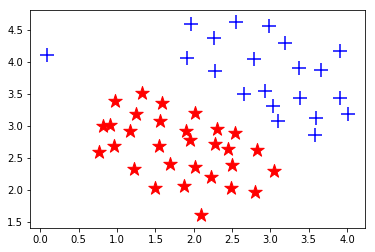

In [14]:
m=X.shape[0]
pos=(y==1).reshape(m,1)
neg=(y==0).reshape(m,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],marker="+",s=200,c="b")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="*",s=200,c="r")
plt.show()

In [15]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear",C=1.0)
classifier.fit(X,np.ravel(y))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

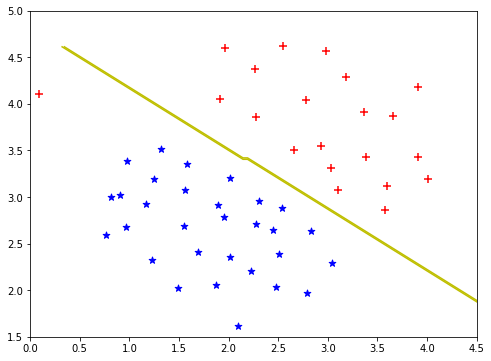

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="b",marker="*",s=50)

# plotting the decision boundary

X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="y")
plt.xlim(0,4.5)
plt.ylim(1.5,5)
plt.show()

In [23]:
#using svc with c=100
from sklearn.svm import SVC
classifier=SVC(kernel="linear",C=100.0)
classifier.fit(X,np.ravel(y))

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

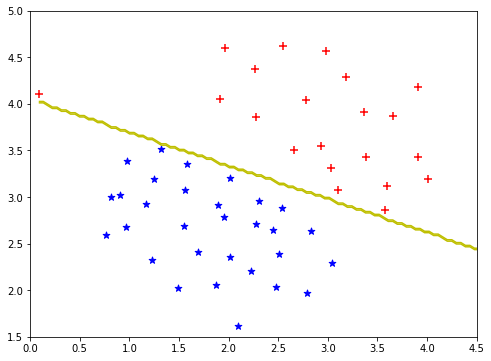

In [24]:

plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="b",marker="*",s=50)
X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="y")
plt.xlim(0,4.5)
plt.ylim(1.5,5)
plt.show()

In [25]:
#

In [26]:
data2=loadmat("ex6data2.mat")

In [27]:
X=data2["X"]
y=data2["y"]

In [28]:
X.shape

(863, 2)

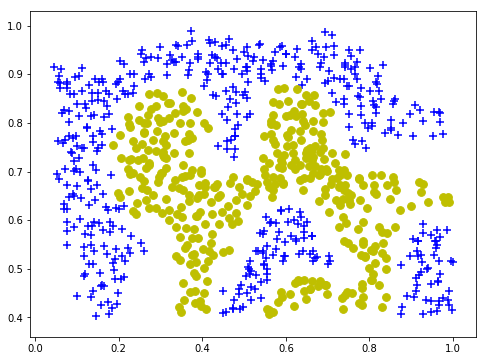

In [32]:
m,n=X.shape
pos=(y==1).reshape(m,1)
neg=(y==0).reshape(m,1)
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="b",marker="+",s=60)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=60)
plt.show()

In [33]:
#now we have to use gaussian kernel to fit this data

In [35]:
from sklearn.svm import SVC
classifier=SVC(kernel="rbf",gamma=30)
classifier.fit(X,np.ravel(y))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

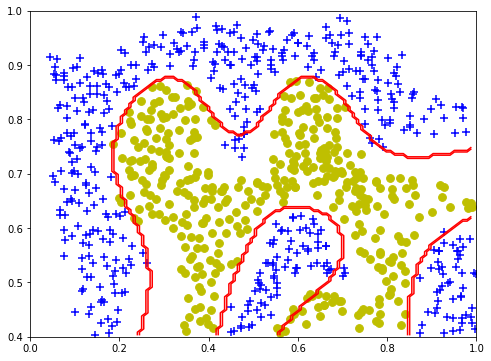

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="b",marker="+",s=60)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=60)
X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="r")
plt.xlim(0,1)
plt.ylim(0.4,1)
plt.show()

In [38]:
data3=loadmat("ex6data3.mat")

In [40]:
[x for x in data3]

['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval']

In [42]:
X=data3["X"]
y=data3["y"]
Xval=data3["Xval"]
yval=data3["yval"]

In [43]:
{"X shape":X.shape,"yshape":y.shape,"Xval shape":Xval.shape,"yval shape":yval.shape}

{'X shape': (211, 2),
 'yshape': (211, 1),
 'Xval shape': (200, 2),
 'yval shape': (200, 1)}

In [44]:
# finding values

In [46]:
def dataParams(X, y, Xval, yval,vals):
    acc = 0
    best_c=0
    best_gamma=0
    for i in vals:
        C= i
        for j in vals:
            gamma = 1/j
            classifier = SVC(C=C,gamma=gamma)
            classifier.fit(X,y)
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            if score>acc:
                acc =score
                best_c =C
                best_gamma=gamma
    return best_c, best_gamma

In [47]:
vals=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C,gamma=dataParams(X,y.ravel(),Xval,yval.ravel(),vals)
classifier=SVC(C=C,gamma=gamma)
classifier.fit(X,y.ravel())

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

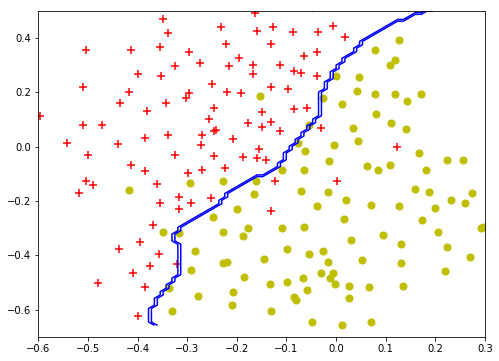

In [50]:
m,n=X.shape
plt.figure(figsize=(8,6))
pos=(y==1).reshape(m,1)
neg=(y==0).reshape(m,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)
X_n,X_m = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_n,X_m,classifier.predict(np.array([X_n.ravel(),X_m.ravel()]).T).reshape(X_n.shape),1,colors="b")
plt.xlim(-0.6,0.3)
plt.ylim(-0.7,0.5)
plt.show()

In [51]:
#spam classifier